<a href="https://colab.research.google.com/github/benvictoria17/pandas/blob/master/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import plotly
import plotly.express as px
import plotly.graph_objs as go 
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/heart_failure_clinical_records_dataset.csv")

In [21]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [22]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [23]:
df.shape

(299, 13)

In [24]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [25]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [26]:
def missing_value_of_data(data):
    total=df.isnull().sum().sort_values(ascending=False)
    percentage=round(total/df.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
missing_value_of_data(df)

,Total,Percentage
DEATH_EVENT,0,0.0
time,0,0.0
smoking,0,0.0
sex,0,0.0
serum_sodium,0,0.0
serum_creatinine,0,0.0
platelets,0,0.0
high_blood_pressure,0,0.0
ejection_fraction,0,0.0
diabetes,0,0.0


In [27]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [28]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [29]:
fig = px.pie(df, names = "DEATH_EVENT", title = "DEATH_EVENT", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [30]:
fig = px.pie(df, names = "anaemia", title = "anaemia", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [31]:
fig = px.pie(df, names = "diabetes", title = "diabetes", color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



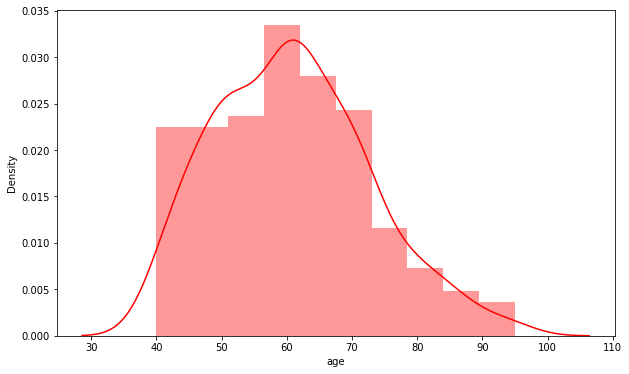

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'], color='r')
plt.show()

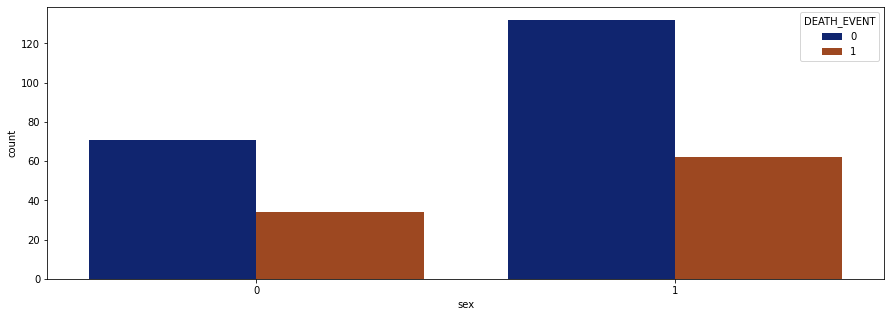

In [33]:
fig = px.histogram(
    df, 
    "creatinine_phosphokinase", 
    nbins=80, 
    title ='creatinine_phosphokinase', 
    width=800,
    height=500
)

fig.show()
fig = px.histogram(
    df, 
    "platelets", 
    nbins=80, 
    title ='platelets ', 
    width=800,
    height=500
)

fig.show()
fig = px.pie(df, names = "smoking", title = "smoking", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()
trace0 = go.Box(
    name = "serum_creatinine",
    y = df["serum_creatinine"]
)

trace1 = go.Box(
    name = "serum_sodium",
    y = df["serum_sodium"]
)

trace2 = go.Box(
    name = "ejection_fraction",
    y = df["ejection_fraction"]
)

trace3 = go.Box(
    name = "high_blood_pressure",
    y = df["high_blood_pressure"] 
)




data = [trace0, trace1, trace2 , trace3 ]
plotly.offline.iplot(data)
fig = px.scatter_matrix(df, dimensions=['platelets', 'age', 'serum_creatinine', 'DEATH_EVENT'])
fig.show()
fig = px.box(
    df, 
    x="DEATH_EVENT", 
    y="creatinine_phosphokinase", 
    title='creatinine_phosphokinase & DEATH_EVENT box plot',
    width=500,
    height=700    
)

fig.show()
fig =px.bar(df,x='serum_sodium', y='DEATH_EVENT',barmode='group',
             height=600)
fig.show()
plt.subplots(figsize=(15,5))
sns.countplot(x = 'sex', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

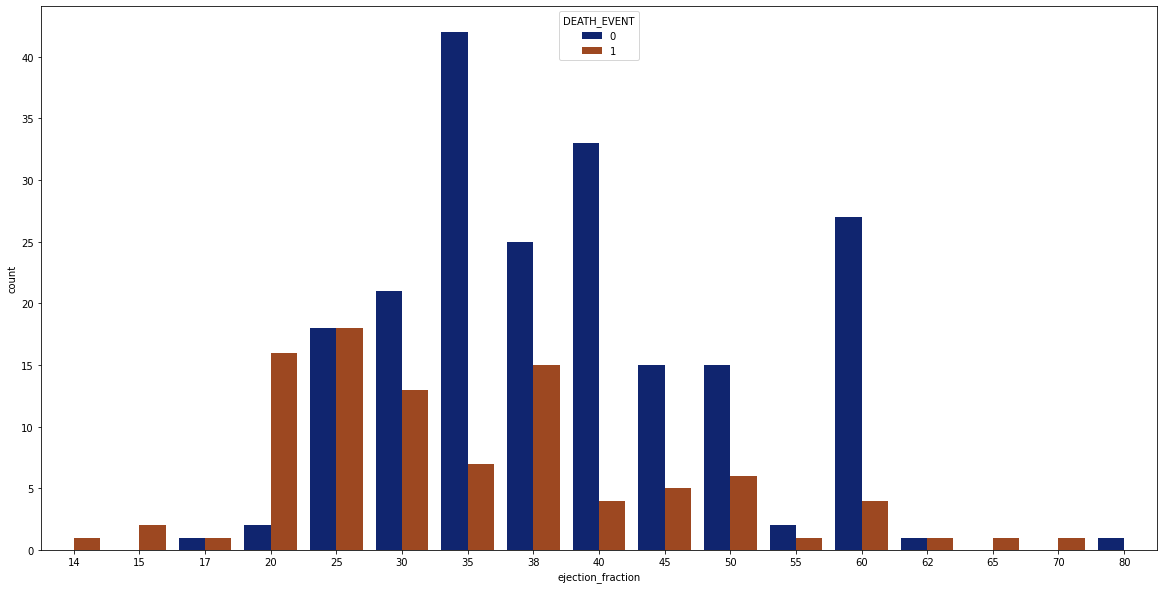

In [34]:
plt.subplots(figsize=(20,10))
sns.countplot(x = 'ejection_fraction', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

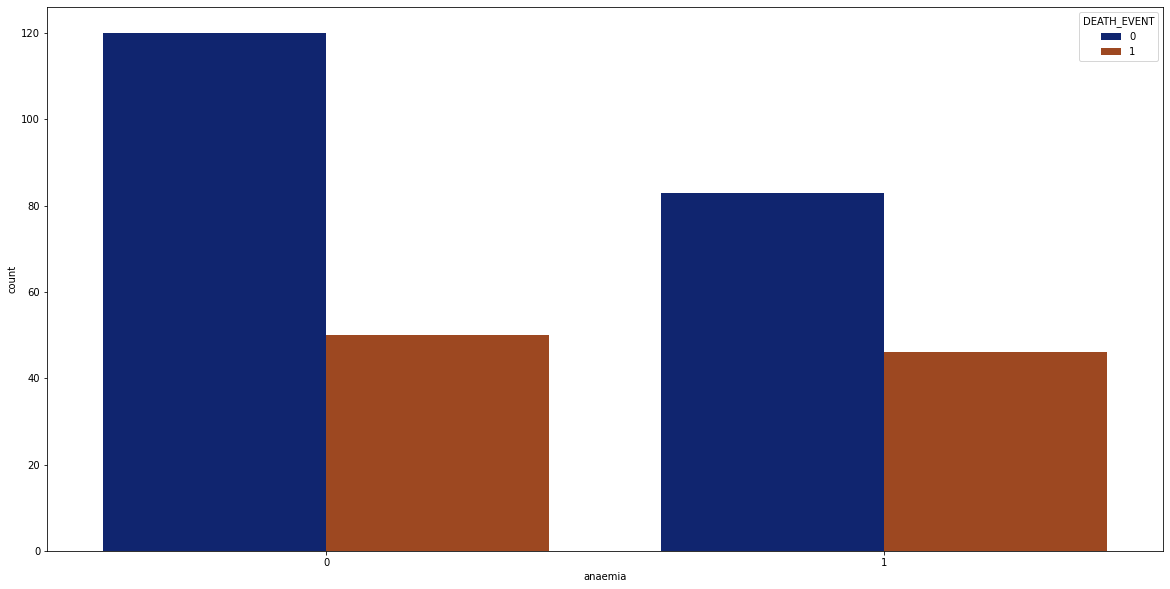

In [35]:
plt.subplots(figsize=(20,10))
sns.countplot(x = 'anaemia', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

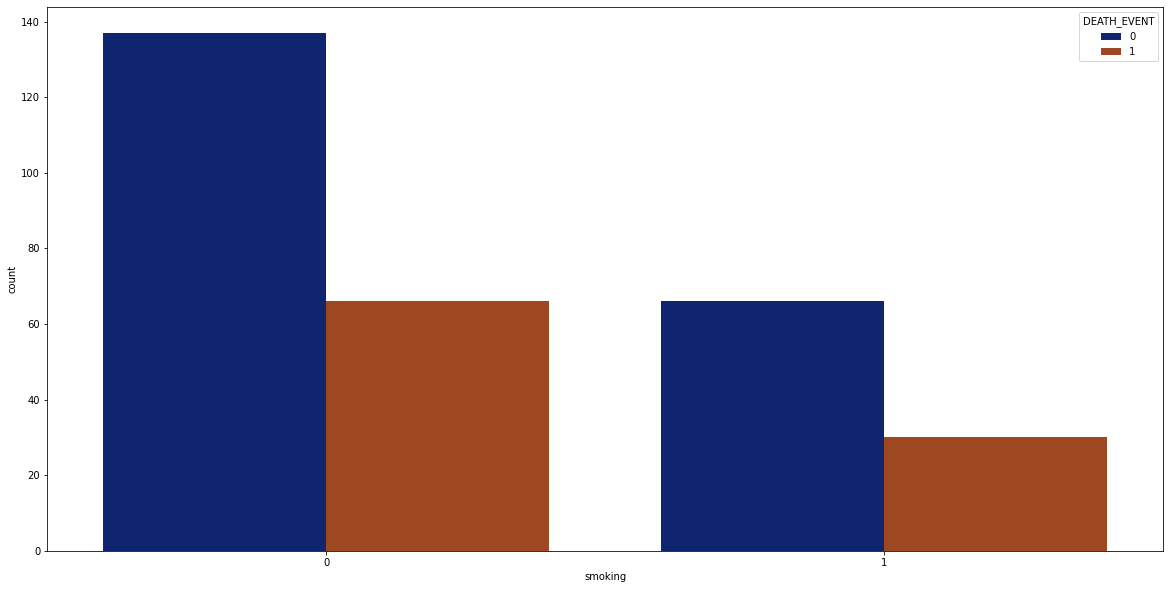

In [36]:
plt.subplots(figsize=(20,10))
sns.countplot(x = 'smoking', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

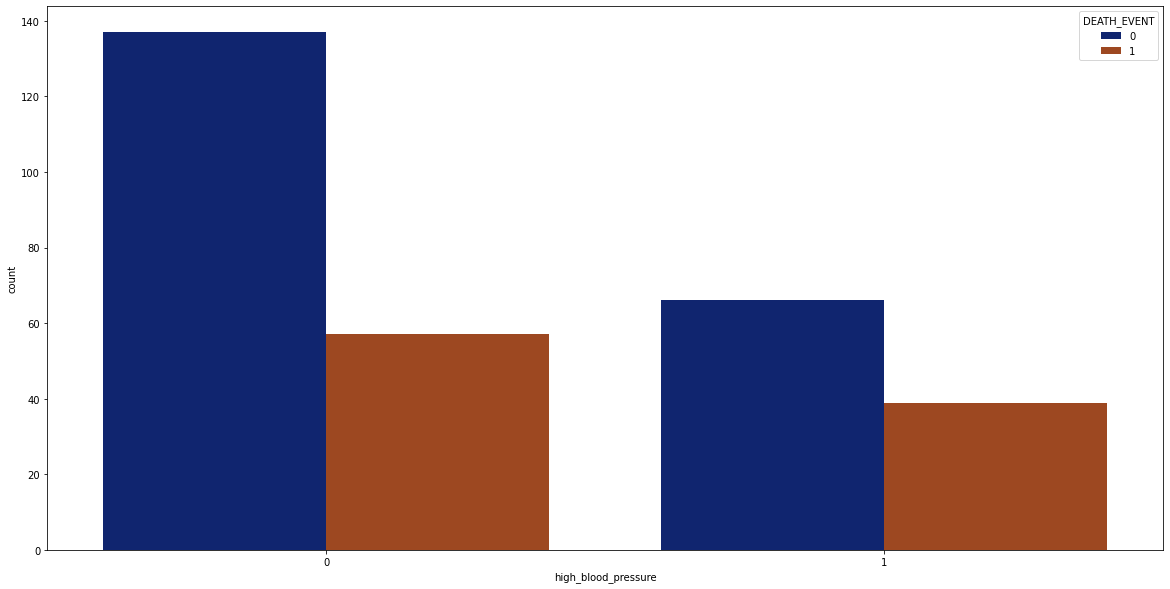

In [38]:
plt.subplots(figsize=(20,10))
sns.countplot(x = 'high_blood_pressure', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

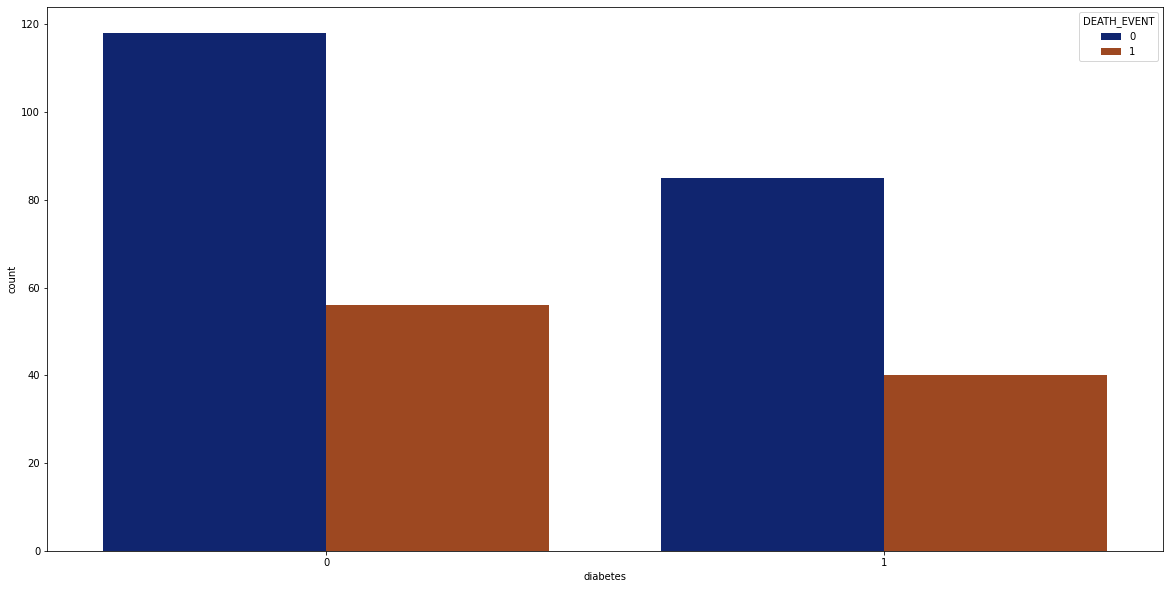

In [39]:
plt.subplots(figsize=(20,10))
sns.countplot(x = 'diabetes', data = df, hue = 'DEATH_EVENT', palette = 'dark')
plt.show()

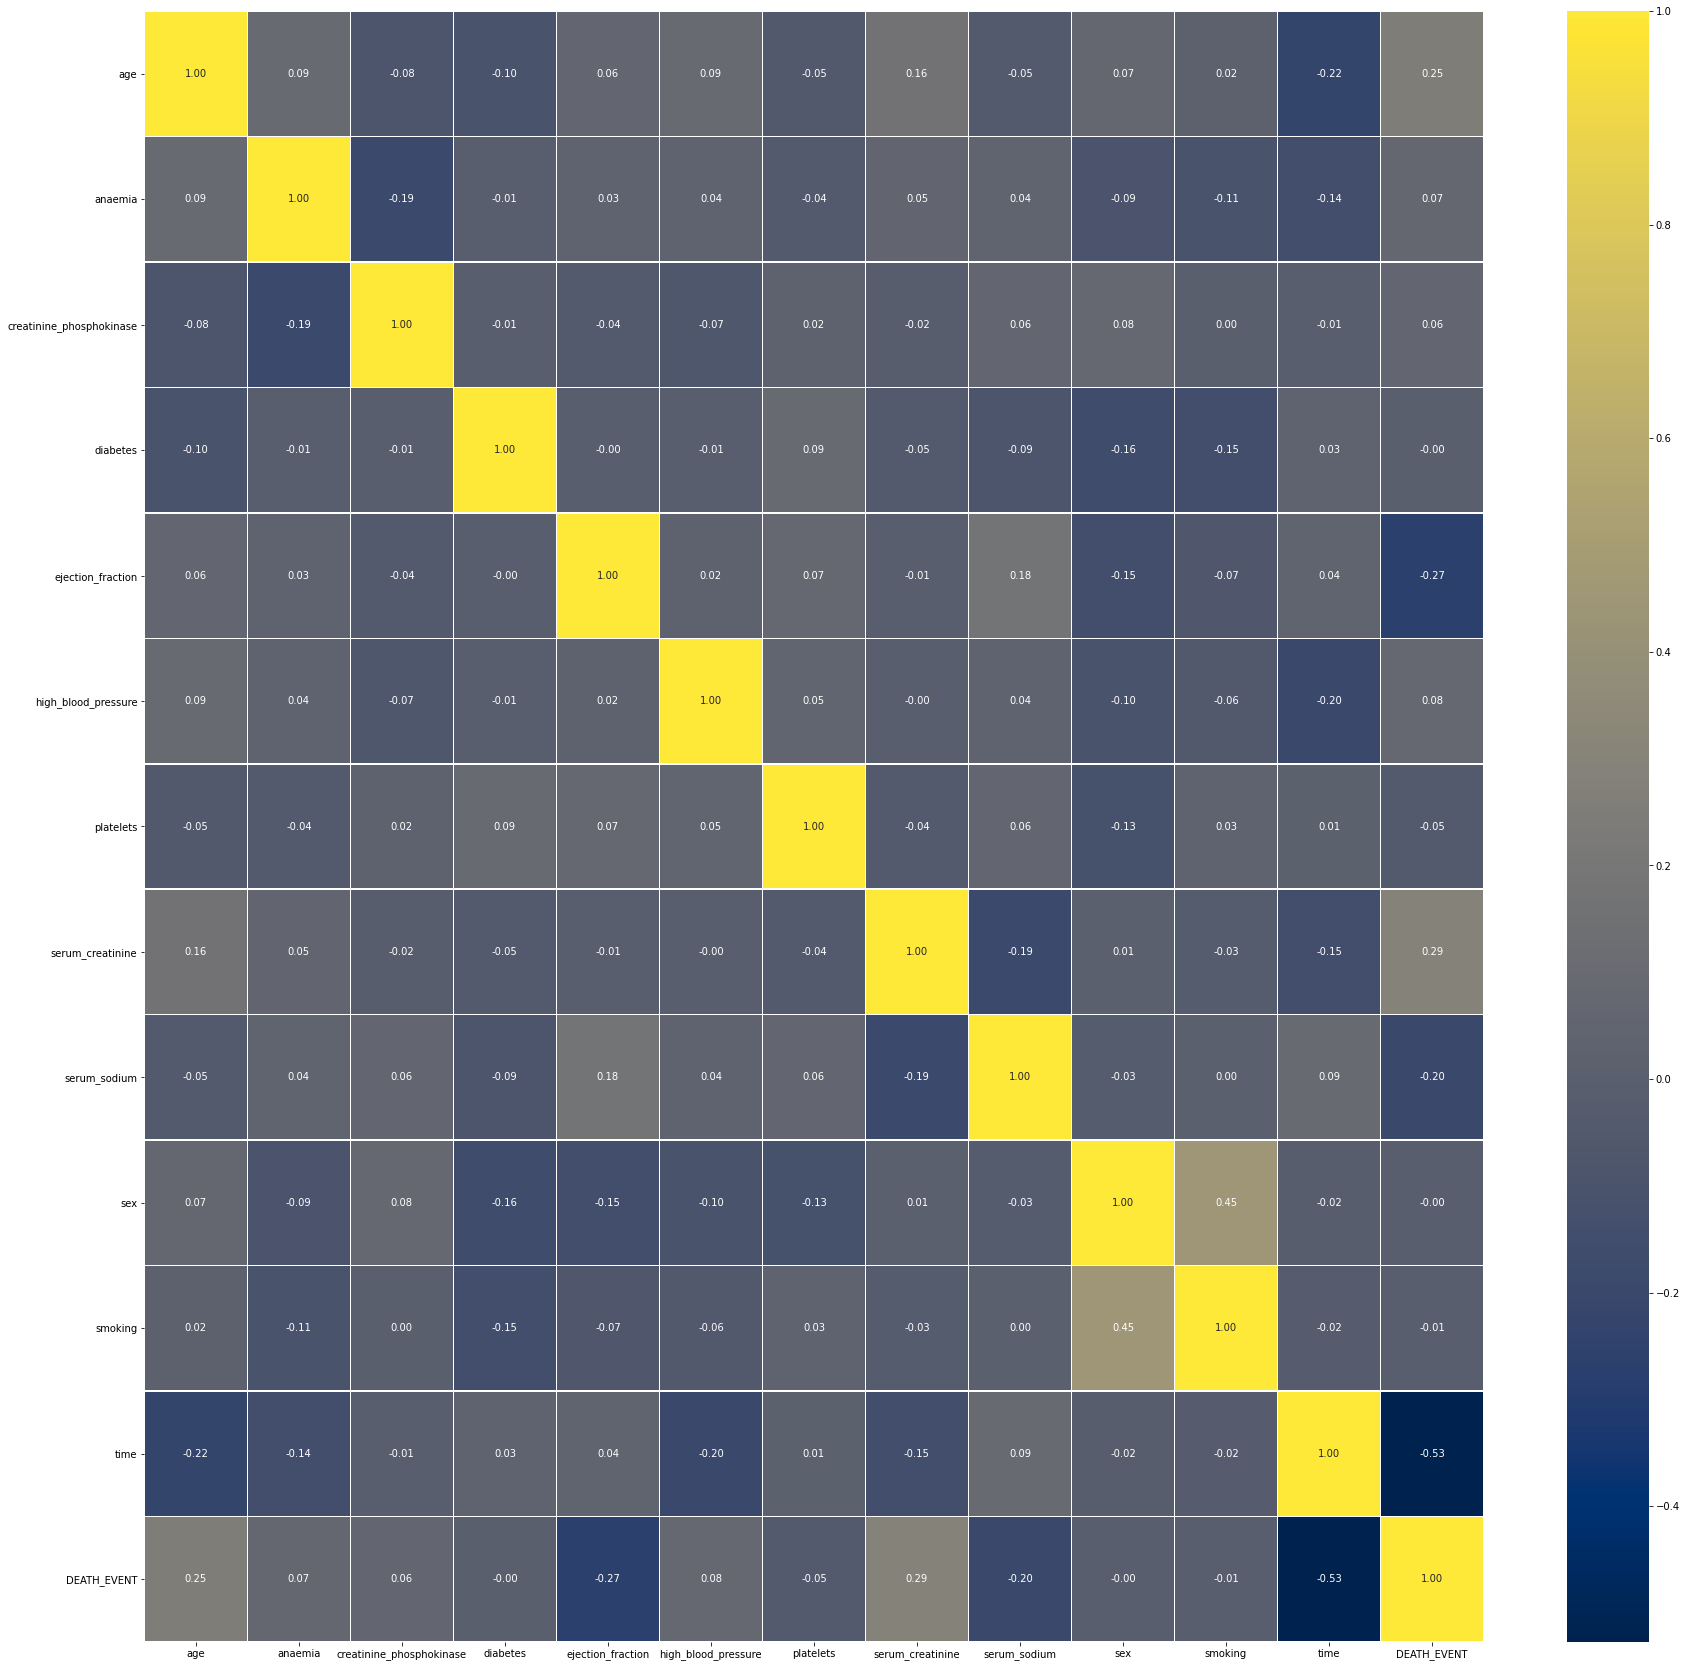

In [40]:
df.corr
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(), annot =True, linewidth =".5", fmt =".2f", cmap='cividis')
plt.show()

In [41]:
df['age'] = df['age'] / df['age'].max()
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'] / df['creatinine_phosphokinase'].max()
df['ejection_fraction'] = df['ejection_fraction'] / df['ejection_fraction'].max()
df['platelets'] = df['platelets'] / df['platelets'].max()
df['serum_creatinine'] = df['serum_creatinine'] / df['serum_creatinine'].max()
df['serum_sodium'] = df['serum_sodium'] / df['serum_sodium'].max()
df['time'] = df['time'] / df['time'].max()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.789474,0,0.074036,0,0.250,1,0.311765,0.202128,0.878378,1,0,0.014035,1
1,0.578947,0,1.000000,0,0.475,0,0.309833,0.117021,0.918919,1,0,0.021053,1
2,0.684211,0,0.018573,0,0.250,0,0.190588,0.138298,0.871622,1,1,0.024561,1
3,0.526316,1,0.014120,0,0.250,0,0.247059,0.202128,0.925676,1,0,0.024561,1
4,0.684211,1,0.020354,1,0.250,0,0.384706,0.287234,0.783784,0,0,0.028070,1


In [42]:
X = df.drop(columns=["DEATH_EVENT"])
y = df["DEATH_EVENT"]
from sklearn.model_selection import train_test_split

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)
from sklearn.ensemble import RandomForestClassifier

#Applying RandomForestClassifier Model 

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
#print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.89
RandomForestClassifierModel Test Score is :  0.8282828282828283


Confusion Matrix is : 
 [[60  5]
 [12 22]]


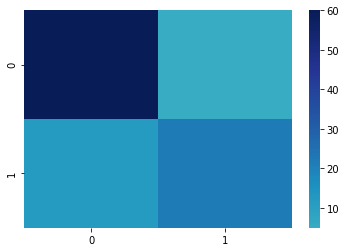

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='YlGnBu')
plt.show()